In [1]:
def load_score(src_file):
    scores = []
    with open(src_file) as fin:
        for line in fin:
            score = float((line.strip('\n\r').split('\t'))[5])
            scores.append(score)
    return scores
file1 = '../data/first_review/part-0107_0116.data.1001_1230'
file2 = '../data/first_review/part-0107_0116.data.0701_0930'
#file3 = '../data/first_review/part-0107_0116.data.online_quantile'

file1 = '../data/random_global/part-golabl_cmt_10day.data.1001_1230'
file2 = '../data/random_global/part-golabl_cmt_10day.data.0701_0930'
#file3 = '../data/random_global/part-golabl_cmt_10day.data.online_quantile'

file3 = '../data/first_review_bds/part-0107_0116.data.1001_1230'
file4 = '../data/first_review_bds/part-0107_0116.data.0701_0930'

file3 = '../data/random_global_bds/part-golabl_cmt_10day.data.1001_1230'
file4 = '../data/random_global_bds/part-golabl_cmt_10day.data.0701_0930'


scores1 = load_score(file1)
print(len(scores1), scores1[0:5])
scores2 = load_score(file2)
print(len(scores2), scores2[0:5])
scores3 = load_score(file3)
print(len(scores3), scores3[0:5])
scores4 = load_score(file4)
print(len(scores4), scores4[0:5])



100000 [0.626, 0.096, 0.795, 0.949, 0.409]
100000 [0.584, 0.083, 0.762, 0.941, 0.369]
100000 [0.574, 0.223, 0.456, 0.894, 0.215]
100000 [0.545, 0.203, 0.429, 0.879, 0.195]


Text(0.0, 1.0, 'CDF: random-comment')

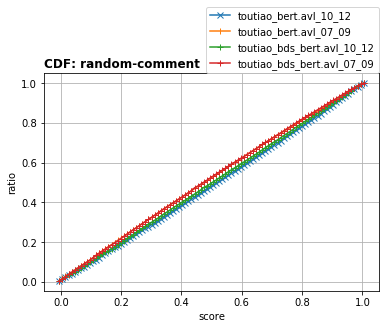

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
plt.rcParams['figure.figsize'] = (50.0, 50.0)
plt.rcParams['savefig.dpi'] = 1000
plt.rcParams['figure.dpi'] = 1000
plt.xlabel('score')
plt.ylabel('ratio')
x = [i for i in range(0, 1000)]
#print(x)
limit = 100

res = stats.relfreq(scores1, numbins=limit)
x1 = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)
y1 = np.cumsum(res.frequency)
plt.plot(x1, y1, "x-", label="toutiao_bert.avl_10_12")

res = stats.relfreq(scores2, numbins=limit)
x2 = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)
y2 = np.cumsum(res.frequency)
plt.plot(x2, y2, "|-", label="toutiao_bert.avl_07_09")


res = stats.relfreq(scores3, numbins=limit)
x3 = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)
y3 = np.cumsum(res.frequency)
plt.plot(x3, y3, "+-", label="toutiao_bds_bert.avl_10_12")

res = stats.relfreq(scores4, numbins=limit)
x4 = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)
y4 = np.cumsum(res.frequency)
plt.plot(x4, y4, "+-", label="toutiao_bds_bert.avl_07_09")


#plt.plot(scores1[0:limit], x[0:limit], "x-",label="toutiao_bert")
#plt.plot(scores2[0:limit], x[0:limit], "+-",label="toutiao_bds_bert")

plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=4, borderaxespad=0.)
plt.title('CDF: random-comment',fontsize='large', fontweight='bold', loc='left')
